In [1]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except cameras
    for obj in bpy.context.scene.objects:
        if  obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()
    
    # add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

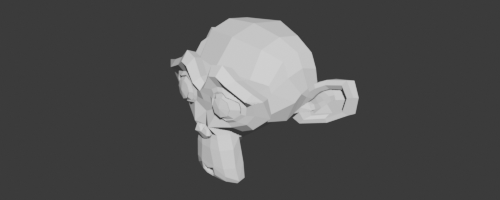

In [2]:
fresh_scene()
bpy.ops.mesh.primitive_monkey_add(size=2.5, location=(0, 0, 0))
render_result()

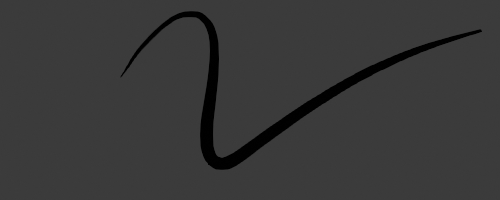

In [3]:
fresh_scene()
gpencil_object = bpy.ops.object.gpencil_add(location=(0, 0, 0), type='STROKE')
gpencil_object = bpy.context.active_object
gpencil_object.scale = (3, 3, 3)

render_result()

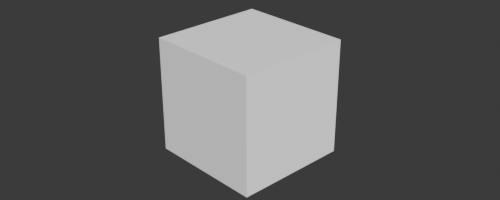

In [4]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
render_result()

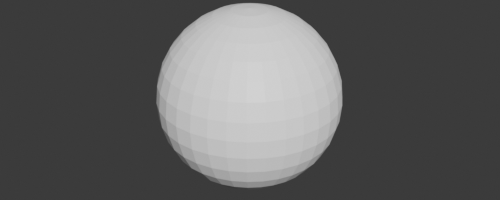

In [5]:
fresh_scene()
bpy.ops.mesh.primitive_uv_sphere_add(radius=1.5, location=(0, 0, 0)) 
render_result()

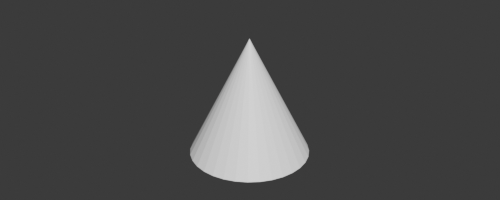

In [6]:
fresh_scene()
bpy.ops.mesh.primitive_cone_add(radius1=1, depth=2, location=(0, 0, 0))  
render_result()

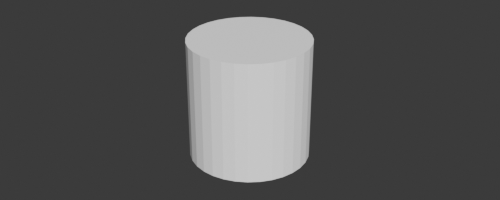

In [7]:
fresh_scene()
bpy.ops.mesh.primitive_cylinder_add(radius=1, depth=2, location=(0, 0, 0)) 
render_result()

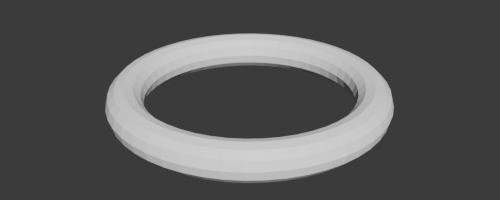

In [8]:
fresh_scene()
bpy.ops.mesh.primitive_torus_add(major_radius=2, minor_radius=0.3, location=(0,0, 0))
render_result()

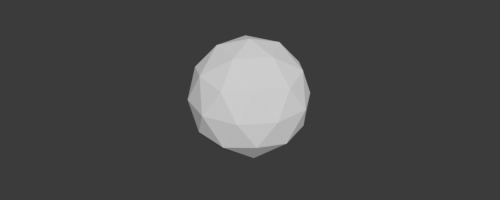

In [9]:
fresh_scene()
bpy.ops.mesh.primitive_ico_sphere_add(radius=1, location=(0, 0, 0)) 
render_result()

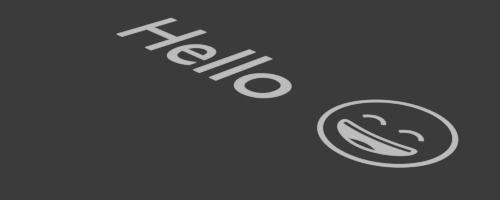

In [10]:
fresh_scene()
bpy.ops.object.text_add(location=(-4, 0, 0))
bpy.context.object.data.body = "Hello 😄"
bpy.context.object.scale = (2, 2, 2)
render_result()

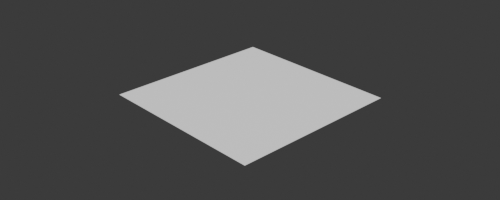

In [17]:
fresh_scene()
bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 0))  
render_result()

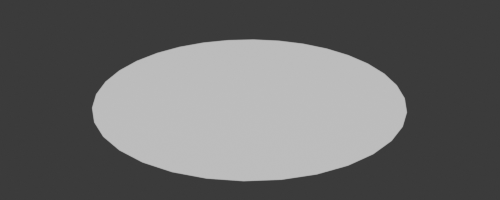

In [20]:
fresh_scene()
bpy.ops.mesh.primitive_circle_add(radius=2.5, location=(0, 0, 0), fill_type='NGON')
render_result()

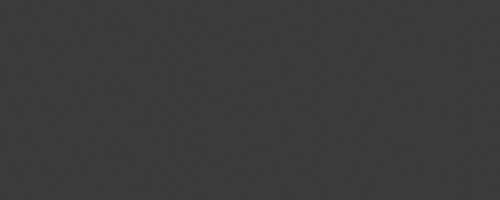

In [13]:
fresh_scene()
bpy.ops.object.empty_add(type='PLAIN_AXES', location=(4, 0, 0)) # (This is not shown in the image, but it is there :) )
render_result()

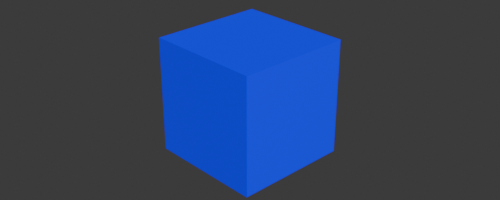

In [14]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a blue material to the cube
mat = bpy.data.materials.new(name="BlueMaterial")
mat.use_nodes = True
bsdf = mat.node_tree.nodes.get('Principled BSDF')
bsdf.inputs['Base Color'].default_value = (0, 0, 1, 1)  # Blue color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)
render_result()

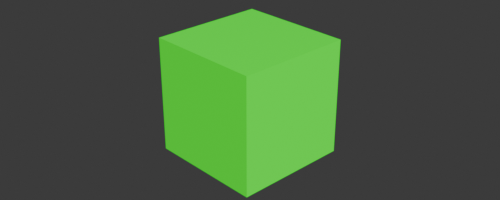

In [15]:
fresh_scene()

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a green material to the cube without using nodes
mat = bpy.data.materials.new(name="GreenMaterial")
mat.diffuse_color = (0, 1, 0, 1)  # Green color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)

render_result()

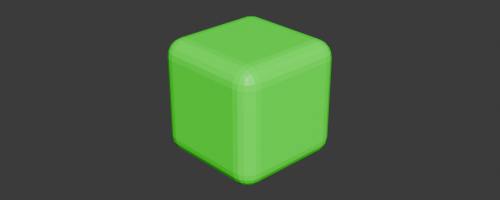

In [16]:
bevel_modifier = cube.modifiers.new(name="Bevel", type='BEVEL')
bevel_modifier.width = 0.3  # Adjust the bevel width
bevel_modifier.segments = 5  # Number of segments for a smoother bevel

# Optionally apply the modifier if needed (not necessary for visualization)
# bpy.ops.object.modifier_apply(modifier="Bevel")

render_result()